In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure #scale the view
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import f1_score
from warnings import filterwarnings
from yellowbrick.cluster import KElbowVisualizer
import time
from datetime import date

In [2]:
dataImport = pd.read_csv('winequality-red.csv')
print("Successfully Imported Data!")
dataImport.head()
# print(dataImport.head()) # show all the datas
dataImport.shape

Successfully Imported Data!


(1599, 12)

In [3]:
dataImport.dtypes
# print(dataImport.dtypes) # show data type inside of data
dataImport.describe(include='all')
# print(dataImport.describe(include='all')) #describe all of datas
dataImport.isnull().any().any() # check missing data
# print(dataImport.isnull().any().any())
dataImport.applymap(np.isreal)
# print(dataImport.applymap(np.isreal))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,True,True,True,True,True,True,True,True,True,True,True,True
1595,True,True,True,True,True,True,True,True,True,True,True,True
1596,True,True,True,True,True,True,True,True,True,True,True,True
1597,True,True,True,True,True,True,True,True,True,True,True,True


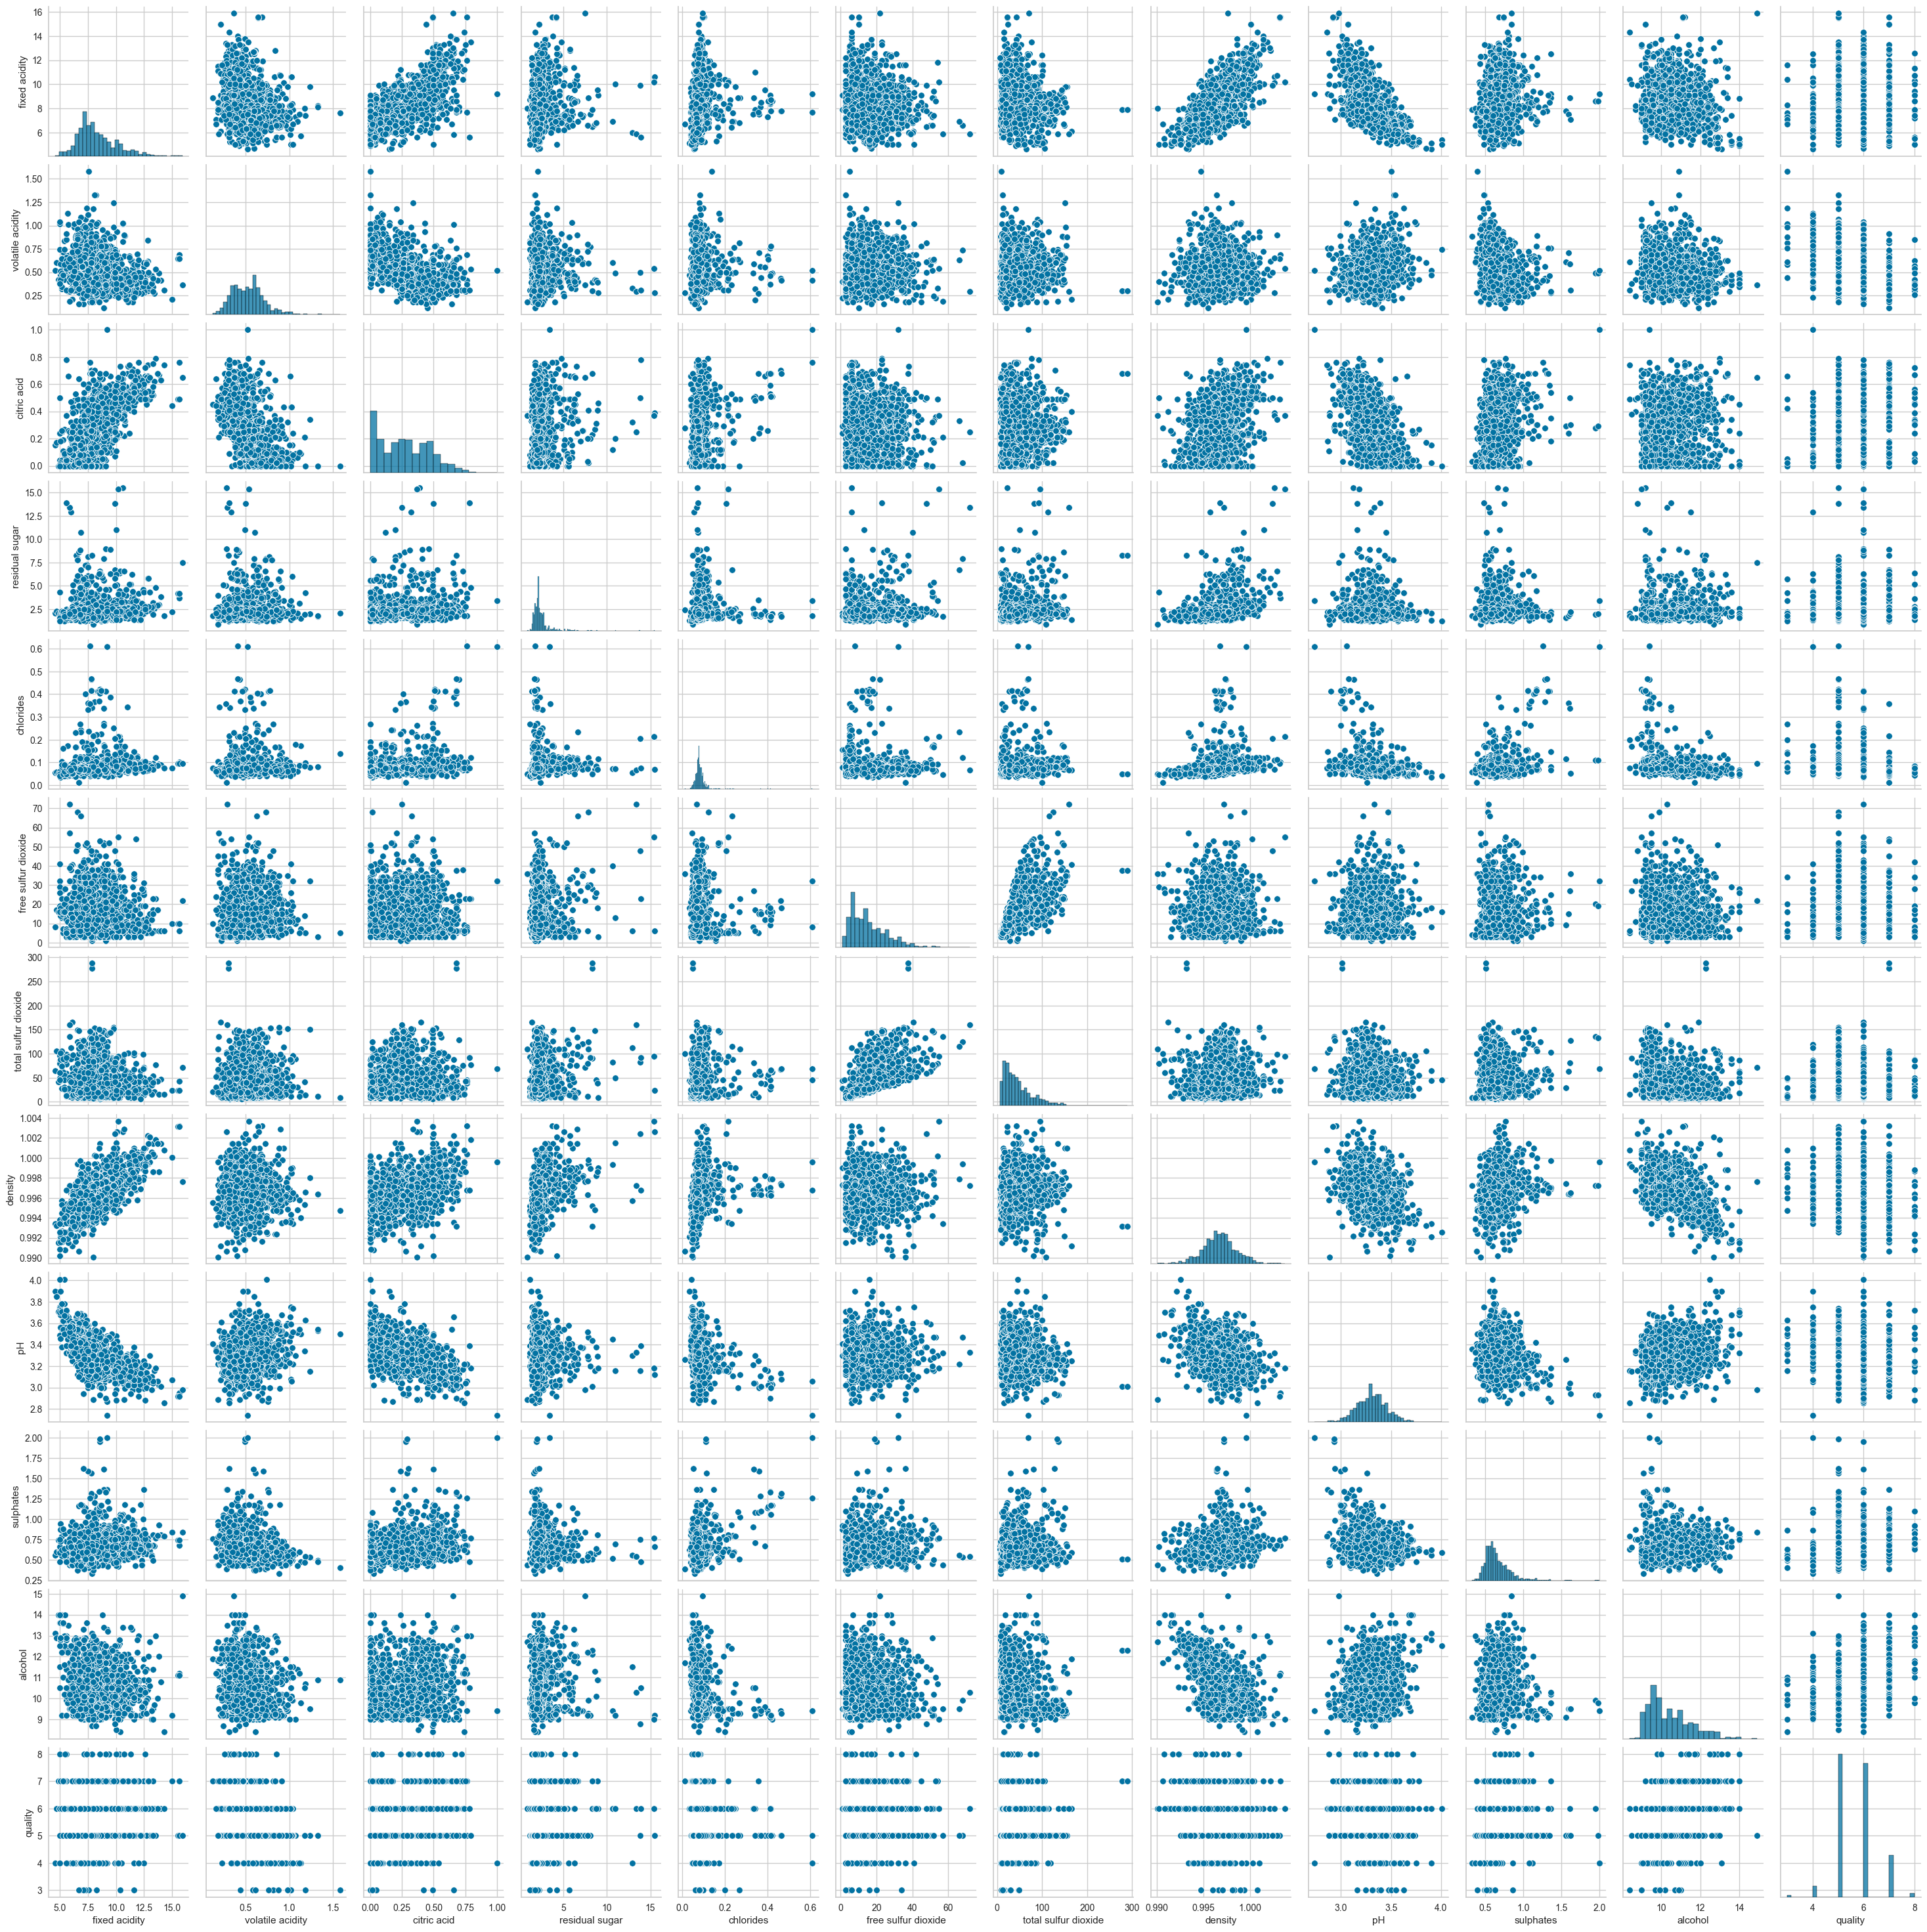

In [4]:
visual = sns.pairplot(dataImport)
# plt.show()
# plt.savefig('/Users/dentabramasta/FigureKKWine/', transparent=True)
# print(visual)

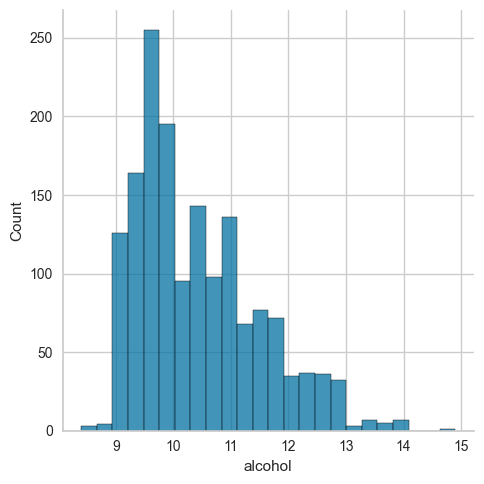

In [5]:
visual2 = sns.displot(dataImport['alcohol'])
# plt.show()
# plt.savefig('test.png', dpi=100)

Text(0.5, 1.0, 'Correlation')

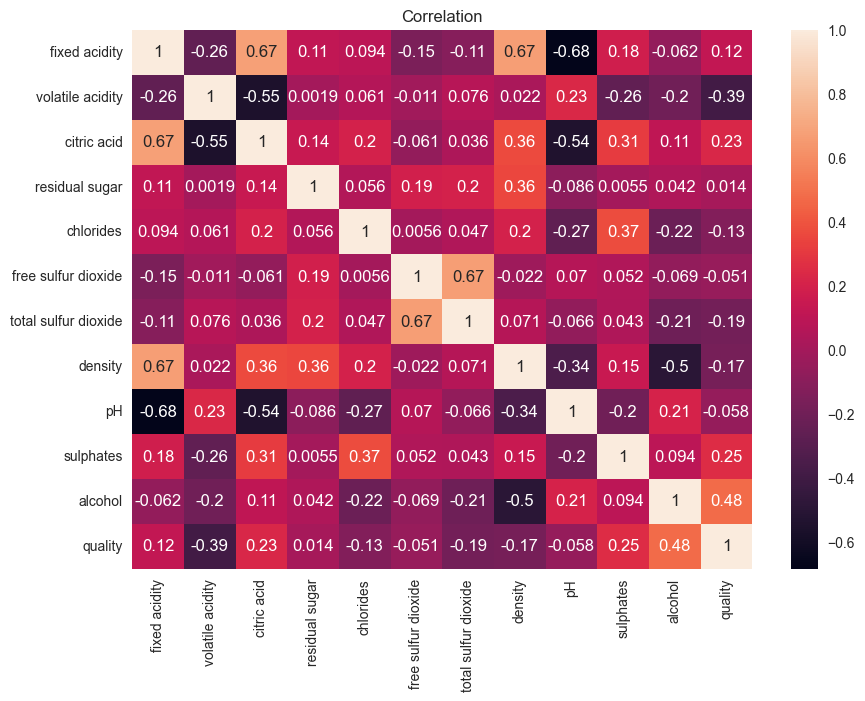

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(dataImport.corr(), annot=True)
plt.title('Correlation')

In [7]:
# set the x and y and array
X = dataImport.iloc[:, 0:11]
y = dataImport['alcohol']
X_scaled = StandardScaler().fit_transform(X)
print(dataImport.head()) 

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

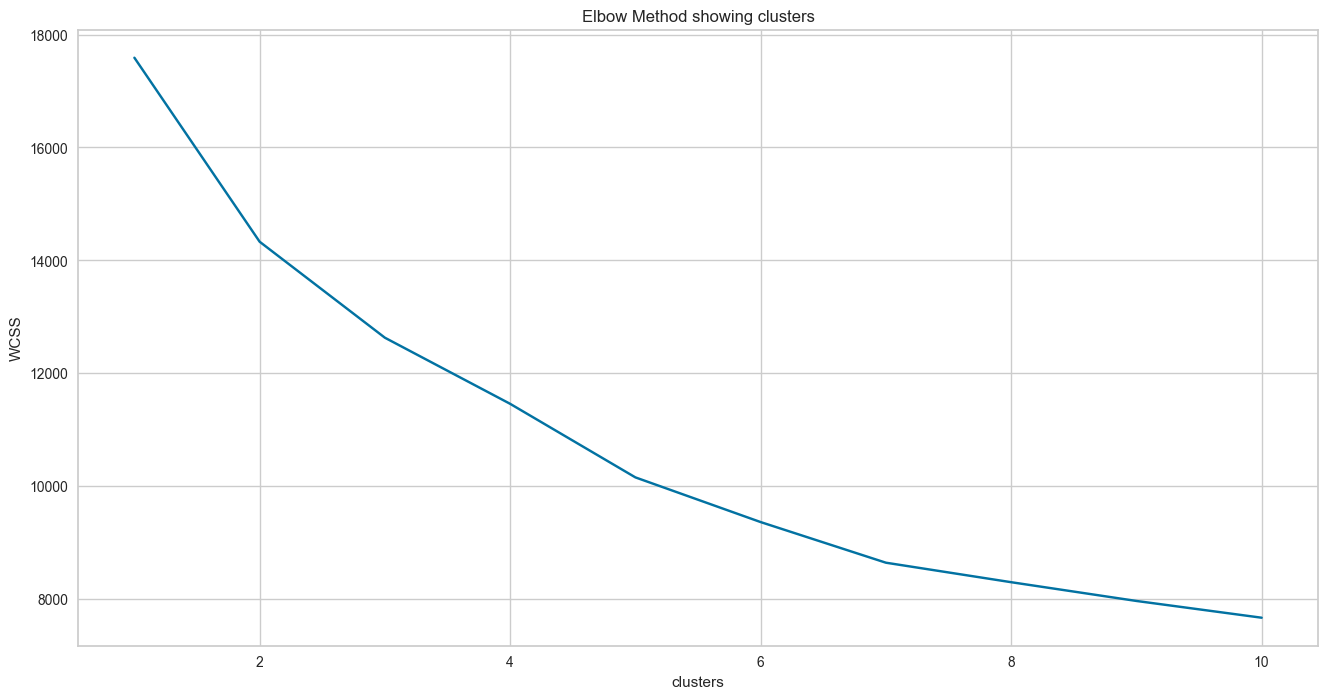

In [8]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(16, 8))
plt.plot(range(1,11),wcss)
plt.title('Elbow Method showing clusters')
plt.xlabel('clusters')
plt.ylabel('WCSS')
plt.show()

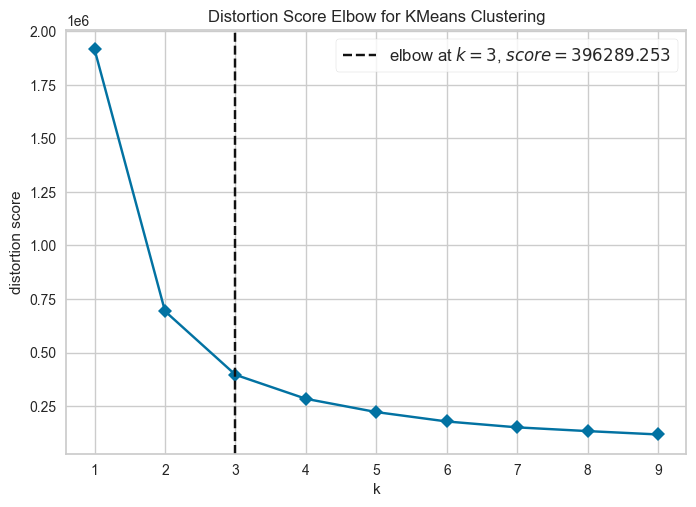

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,10),timings=False)
visualizer.fit(dataImport)
visualizer.show()

In [10]:
kmeans = KMeans(n_clusters = 2)
start_time = time.time()
clusters = kmeans.fit_predict(X_scaled)
today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))
labels = kmeans.labels_

--- 0.3308279514312744 seconds ---


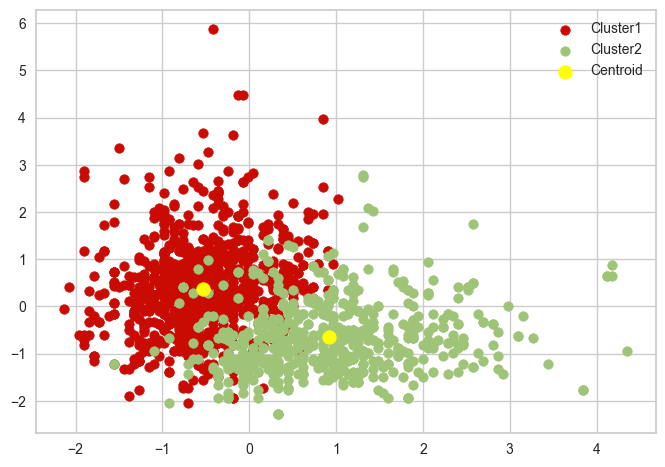

In [11]:
#Visualization of clustering
colors = 'rgbkcmy'
for i in np.unique(clusters):
    plt.scatter(X_scaled[clusters==i,0],
               X_scaled[clusters==i,1],
               color=colors[i], label='Cluster' + str(i+1))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroid')
plt.legend()
plt.show()

In [12]:
pca = PCA(n_components=6)
pc_X = pca.fit_transform(X_scaled)
pc_columns = ['pc1','pc2','pc3','pc4','pc5','pc6']
print(pca.explained_variance_ratio_.sum())

0.8552471350764363


In [22]:
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,max_iter=100)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    print("cluster: {} silhouette score is: {}".format(i,score))

cluster: 2 silhouette score is: 0.21372996335560532
cluster: 3 silhouette score is: 0.18920406811177048
cluster: 4 silhouette score is: 0.2063736349820086
cluster: 5 silhouette score is: 0.1901392066374596
cluster: 6 silhouette score is: 0.1925700477862272
cluster: 7 silhouette score is: 0.19196487213099978
cluster: 8 silhouette score is: 0.15096589966506035
cluster: 9 silhouette score is: 0.1524437940626774


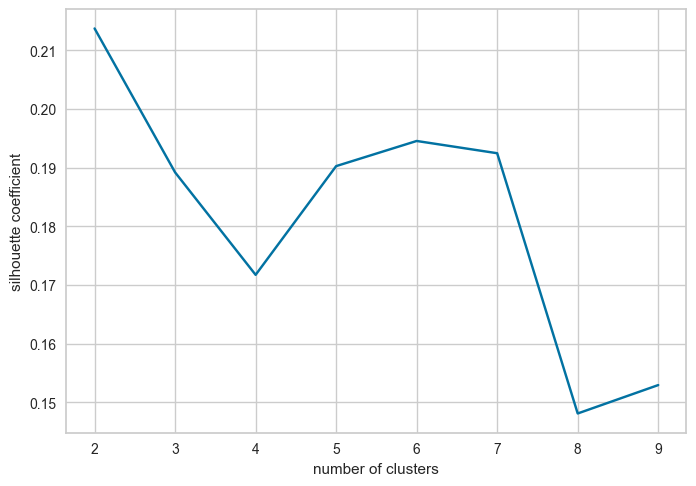

In [23]:
silhouette_coefficients = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2,10), silhouette_coefficients)
plt.xticks(range(2,10))
plt.xlabel("number of clusters")
plt.ylabel("silhouette coefficient")
plt.show()

In [13]:
# Kmeans with PCA
kmeans = KMeans(n_clusters = 2)
start_time = time.time()
clusters = kmeans.fit_predict(pc_X)
today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))
labels = kmeans.labels_

--- 0.2796669006347656 seconds ---


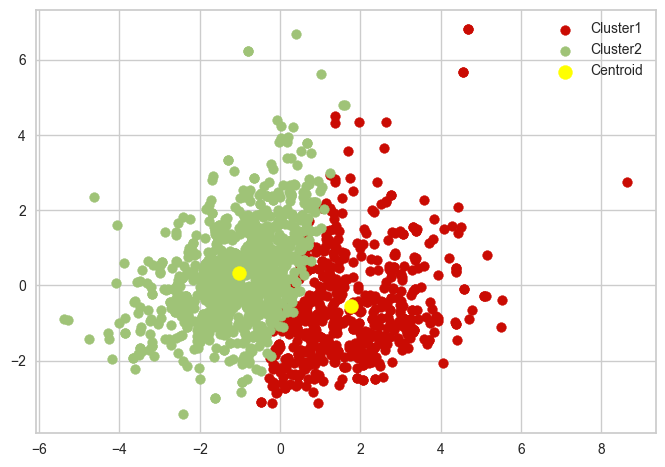

In [14]:
#2D plot
colors = 'rgbkcmy'
for i in np.unique(clusters):
    plt.scatter(pc_X[clusters==i,0],
               pc_X[clusters==i,1],
               color=colors[i], label='Cluster' + str(i+1))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroid')
plt.legend()
plt.show()